In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer=load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [11]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df_feat
y=cancer['target']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [15]:
from  sklearn.svm import SVC

In [16]:
model=SVC()

In [17]:
model.fit(X_train,y_train)

SVC()

In [18]:
predictions = model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 56  10]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [23]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [27]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [28]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [29]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [30]:
grid_predictions = grid.predict(X_test)


In [33]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



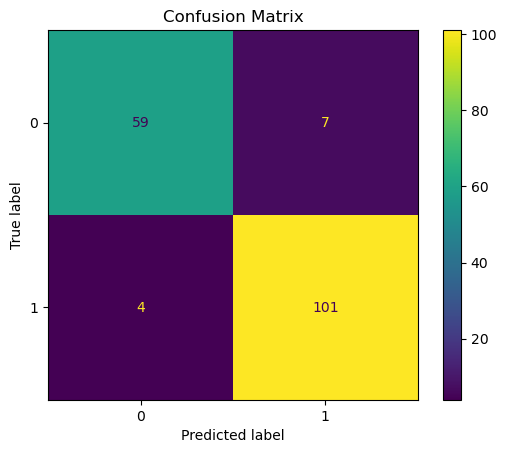

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, grid_predictions)
plt.title("Confusion Matrix")
plt.show()
